<a href="https://colab.research.google.com/github/SuhasBRao/ML-assignments/blob/main/Coding_Tutorial_(week3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
# Save the input and target variables

data = diabetes_dataset['data']
target = diabetes_dataset['target']
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [4]:
# Normalise the target data (this will make clearer training curves)
# Normalise the target data (this will make clearer training curves)

target = (target - target.mean(axis = 0)) / target.std()
target


array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [5]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, target, test_size = 0.1)

print(train_data.shape, test_data.shape)

(397, 10) (45, 10)


#### Train a feedforward neural network model

In [6]:
# Build the model

# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    
    model = Sequential([
        Dense(128, activation='relu',input_shape = (train_data.shape[1],)),
        Dense(128,activation= 'relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
        ])
    
    return model



In [7]:
# Print the model summary

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [12]:
# Compile the model

model.compile(optimizer= 'adam', loss='mse', metrics= 'mae')


In [13]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, validation_split = 0.15,batch_size = 64, epochs = 100, verbose = False)


In [14]:
# Evaluate the model on the test set


model.evaluate(test_data, test_targets,verbose = 2)


2/2 - 0s - loss: 0.8949 - mae: 0.6584 - 19ms/epoch - 10ms/step


[0.894916296005249, 0.6583579182624817]

#### Plot the learning curves

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

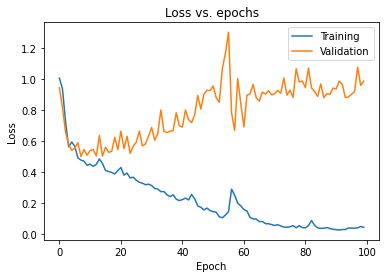

In [16]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [17]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [19]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [20]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5,0.3)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [21]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])


In [22]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs = 100, batch_size=64,
                   validation_split=0.15, verbose = False)

In [23]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose = 2)

2/2 - 0s - loss: 0.4857 - mae: 0.4846 - 23ms/epoch - 11ms/step


[0.48572397232055664, 0.4846078157424927]

#### Plot the learning curves

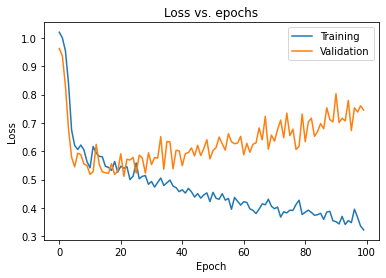

In [24]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [25]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainCallback(Callback):
    
    def on_train_begin(self, logs = None):
        print('Started Training......')
    
    def on_epoch_begin(self, epoch, logs= None):
        print(f'Training : Started epoch {epoch}')
    
    def on_batch_begin(self, batch, logs= None):
        print(f'Training : Started batch {batch}')
        
    def on_batch_end(self, batch, logs = None):
        print(f'Training : Batch {batch} ended...')
    

In [26]:
# Re-build the model

model = get_regularised_model(1e-5, .3)

In [27]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'mse')

#### Train the model with the callback

In [28]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs = 3, batch_size = 128,
                    verbose = False, callbacks = [TrainCallback()])


Started Training......
Training : Started epoch 0
Training : Started batch 0
Training : Batch 0 ended...
Training : Started batch 1
Training : Batch 1 ended...
Training : Started batch 2
Training : Batch 2 ended...
Training : Started batch 3
Training : Batch 3 ended...
Training : Started epoch 1
Training : Started batch 0
Training : Batch 0 ended...
Training : Started batch 1
Training : Batch 1 ended...
Training : Started batch 2
Training : Batch 2 ended...
Training : Started batch 3
Training : Batch 3 ended...
Training : Started epoch 2
Training : Started batch 0
Training : Batch 0 ended...
Training : Started batch 1
Training : Batch 1 ended...
Training : Started batch 2
Training : Batch 2 ended...
Training : Started batch 3
Training : Batch 3 ended...


In [ ]:
# Evaluate the model



In [ ]:
# Make predictions with the model



***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [29]:
# Re-train the unregularised model
unregularizesd_model = get_model()
unregularizesd_model.compile(optimizer = 'adam', loss = 'mse')
unreg_history = unregularizesd_model.fit(train_data, train_targets, epochs = 100,
                         validation_split = 0.2, batch_size = 64,verbose = False,
                                        callbacks = [tf.keras.callbacks.EarlyStopping()])

In [30]:
# Evaluate the model on the test set

unregularizesd_model.evaluate(test_data, test_targets, verbose = 2)

2/2 - 0s - loss: 0.7355 - 19ms/epoch - 10ms/step


0.7355374097824097

In [31]:
# Re-train the regularised model

regularized_model = get_regularised_model(1e-8, 0.2)
regularized_model.compile(optimizer= 'adam', loss = 'mse')

reg_history = regularized_model.fit(train_data, train_targets, epochs = 100, batch_size= 64,
                                         validation_split=0.2, verbose = False, 
                                          callbacks = [tf.keras.callbacks.EarlyStopping(patience= 10)])

In [32]:
# Evaluate the model on the test set
regularized_model.evaluate(test_data, test_targets, verbose = 2)


2/2 - 0s - loss: 0.3742 - 19ms/epoch - 10ms/step


0.3741956055164337

#### Plot the learning curves

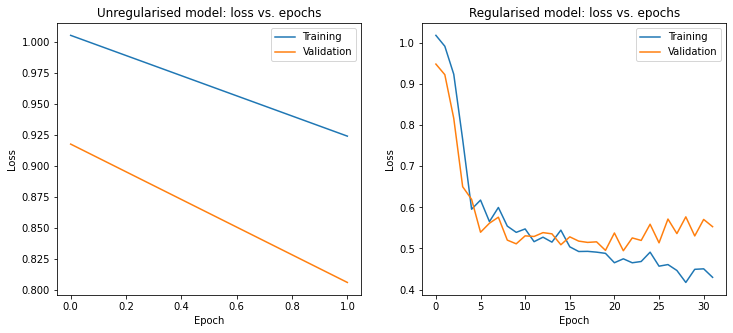

In [33]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()